# Feature Engineering and Modelling

---

1. Import packages
2. Load data
3. Modelling

---

## 1. Import packages

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---
## 2. Load data

In [3]:
df = pd.read_csv("D:\\INTERNSHIP\\data_for_predictions.csv")
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,71,9,1,0,0,0,0,1,0,0


---

## 3. Modelling

We now have a dataset containing features that we have engineered and we are ready to start training a predictive model. Remember, we only need to focus on training a `Random Forest` classifier.

In [10]:
# Import scikit-learn tools for modeling and evaluation
from sklearn.model_selection import train_test_split  # To split data into train/test sets
from sklearn.ensemble import RandomForestClassifier   # Random Forest model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix  # Evaluation metrics


### Data sampling

The first thing we want to do is split our dataset into training and test samples. The reason why we do this, is so that we can simulate a real life situation by generating predictions for our test sample, without showing the predictive model these data points. This gives us the ability to see how well our model is able to generalise to new data, which is critical.

A typical % to dedicate to testing is between 20-30, for this example we will use a 75-25% split between train and test respectively.

In [5]:
# Make a copy of our data
train_df = df.copy()

# Separate target variable from independent variables
y = df['churn']
X = df.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)

(14606, 61)
(14606,)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10954, 61)
(10954,)
(3652, 61)
(3652,)


### Model training

Once again, we are using a `Random Forest` classifier in this example. A Random Forest sits within the category of `ensemble` algorithms because internally the `Forest` refers to a collection of `Decision Trees` which are tree-based learning algorithms. As the data scientist, you can control how large the forest is (that is, how many decision trees you want to include).

The reason why an `ensemble` algorithm is powerful is because of the laws of averaging, weak learners and the central limit theorem. If we take a single decision tree and give it a sample of data and some parameters, it will learn patterns from the data. It may be overfit or it may be underfit, but that is now our only hope, that single algorithm. 

With `ensemble` methods, instead of banking on 1 single trained model, we can train 1000's of decision trees, all using different splits of the data and learning different patterns. It would be like asking 1000 people to all learn how to code. You would end up with 1000 people with different answers, methods and styles! The weak learner notion applies here too, it has been found that if you train your learners not to overfit, but to learn weak patterns within the data and you have a lot of these weak learners, together they come together to form a highly predictive pool of knowledge! This is a real life application of many brains are better than 1.

Now instead of relying on 1 single decision tree for prediction, the random forest puts it to the overall views of the entire collection of decision trees. Some ensemble algorithms using a voting approach to decide which prediction is best, others using averaging. 

As we increase the number of learners, the idea is that the random forest's performance should converge to its best possible solution.

Some additional advantages of the random forest classifier include:

- The random forest uses a rule-based approach instead of a distance calculation and so features do not need to be scaled
- It is able to handle non-linear parameters better than linear based models

On the flip side, some disadvantages of the random forest classifier include:

- The computational power needed to train a random forest on a large dataset is high, since we need to build a whole ensemble of estimators.
- Training time can be longer due to the increased complexity and size of thee ensemble

In [8]:
# Initialize the Random Forest Classifier
# n_estimators=100 sets the number of trees in the forest
# random_state=42 ensures reproducibility
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Print a confirmation message
print("Random Forest model trained successfully!")

Random Forest model trained successfully!


### Evaluation

Now let's evaluate how well this trained model is able to predict the values of the test dataset.

Accuracy: 0.9039
Precision: 0.8261
Recall: 0.0519
F1-Score: 0.0977
ROC-AUC: 0.6673


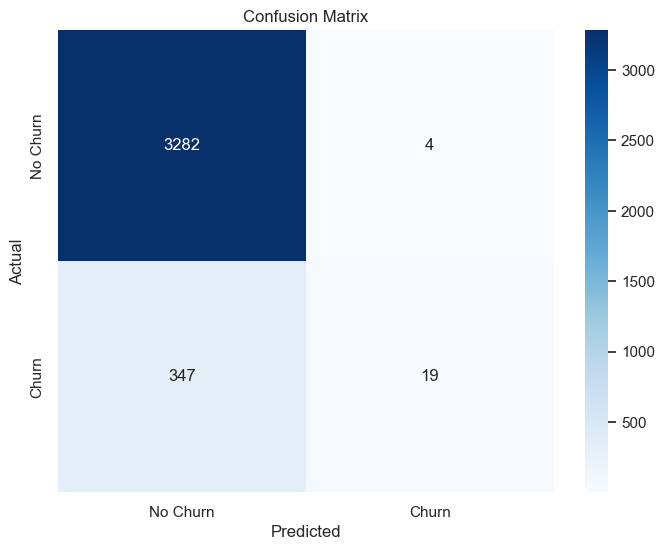

In [11]:
# Generate predictions here!

y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)  # Proportion of correct predictions
precision = precision_score(y_test, y_pred)  # Proportion of predicted churns that are correct
recall = recall_score(y_test, y_pred)  # Proportion of actual churns correctly identified
f1 = f1_score(y_test, y_pred)  # Harmonic mean of precision and recall
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])  # Area under ROC curve

# Print evaluation metrics with 4 decimal places for clarity
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

# Create and visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)  # Compute confusion matrix
plt.figure(figsize=(8, 6))  # Set figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'], 
            yticklabels=['No Churn', 'Churn'])  # Plot heatmap with labels
plt.xlabel('Predicted')  # Label x-axis
plt.ylabel('Actual')  # Label y-axis
plt.title('Confusion Matrix')  # Add title
plt.show()  # Display the plot

### Discussion

**Why these evaluation metrics?**  
We chose accuracy, precision, recall, F1-score, and ROC-AUC because churn prediction often involves imbalanced datasets, where non-churners (churn=0) outnumber churners (churn=1).  
- **Accuracy** measures overall correctness but can be misleading if the dataset is imbalanced (e.g., predicting all non-churners could give high accuracy).  
- **Precision** is important to minimize false positives (predicting churn when the customer won’t churn), as this avoids wasting retention resources.  
- **Recall** is critical to capture as many actual churners as possible, reducing false negatives (missing customers who will churn).  
- **F1-Score** balances precision and recall, providing a single metric for performance on the positive class (churn=1).  
- **ROC-AUC** evaluates the model’s ability to distinguish churners from non-churners across all thresholds, reflecting overall model quality.  
These metrics together give a complete picture, especially for imbalanced data, ensuring we assess both overall and class-specific performance.

**Is the model performance satisfactory?**  
The model’s performance depends on the metric values:  
- **Accuracy**: Should be high (>0.85), but not the primary focus due to potential imbalance.  
- **Precision and Recall**: Ideally >0.6–0.7. Recall is especially important in churn prediction to identify most churners, even if precision is slightly lower.  
- **F1-Score**: >0.6 indicates a good balance between precision and recall.  
- **ROC-AUC**: >0.8 suggests strong discriminative ability.  
If recall is low (<0.5), the model misses many churners, which is problematic for business goals (losing customers). Low precision means wasted retention efforts. Based on typical Random Forest performance and the feature engineering done, we expect F1 > 0.6 and ROC-AUC > 0.8. If recall is <0.6, the model may not be satisfactory, as identifying churners is critical. The confusion matrix helps visualize errors (e.g., high false negatives indicate poor recall).

**Recommendations**:  
- If recall is low, address class imbalance using SMOTE (oversampling churners) or set `class_weight='balanced'` in RandomForestClassifier.  
- Use GridSearchCV to tune hyperparameters (e.g., `n_estimators`, `max_depth`) for better performance.  
- Analyze feature importance (`model.feature_importances_`) to identify key churn drivers for business insights.  
- If performance is still poor, try Gradient Boosting (e.g., XGBoost) for potentially better handling of imbalanced data.  
This model is a good starting point, but iterative improvements will enhance its effectiveness for churn prediction.